# Série Histórica dos preços dos combustíveis no Brasil do primeiro semestre de 2022.

* Fonte: https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda

* No primeiro semestre foi obtida uma amostra de 629.539 registros incluindo os 7 tipos de combustíveis através da pesquisa de preços feita em 20.182 estabelecimentos em todo o território nacional.

* Os Produtos pesquisados foram DIESEL, DIESEL S10, ETANOL, GASOLINA, GASOLINA ADITIVADA, GLP, GNV.

* Análise dos dados do estado do Rio de Janeiro.

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [3]:
str_sqlite = f"sqlite:///combustivel.db"
engine = create_engine(str_sqlite)

In [4]:
sql = """
SELECT est.cnpj_completo,
    revenda,
    regiao_sigla,
    estado_sigla,
	rua,
	numero,
	complemento,
	bairro,
	cep,
    data_coleta,
    valor_venda,
    bandeira,
    nome_produto	
FROM estabelecimento est
INNER JOIN preco p ON est.cnpj_completo = p.cnpj_completo
INNER JOIN produto prod ON p.produto_id = prod.id
ORDER BY p.data_coleta ASC
"""

df = pd.read_sql_query(sql, con=engine, parse_dates={'data_coleta': {'format': '%d/%m/%Y'}})
df.insert(loc=10, column='mes_coleta', value=df.data_coleta.dt.month)

In [37]:
df_rj = df[df['estado_sigla'] == 'RJ']

df_rj_DIESEL = df_rj[df_rj['nome_produto'] == 'DIESEL']
df_rj_DIESEL_S10  = df_rj[df_rj['nome_produto'] == 'DIESEL S10']
df_rj_ETANOL  = df_rj[df_rj['nome_produto'] == 'ETANOL']
df_rj_GASOLINA  = df_rj[df_rj['nome_produto'] == 'GASOLINA']
df_rj_GASOLINA_ADITIVADA  = df_rj[df_rj['nome_produto'] == 'GASOLINA ADITIVADA']
df_rj_GLP  = df_rj[df_rj['nome_produto'] == 'GLP']
df_rj_GNV  = df_rj[df_rj['nome_produto'] == 'GNV']

## Média Nacional de Preço dos Produtos por mês.

In [44]:
df.groupby(['nome_produto', 'mes_coleta'])['valor_venda'].mean().reset_index()

,nome_produto,mes_coleta,valor_venda
0,DIESEL,1,5.512121
1,DIESEL,2,5.614295
2,DIESEL,3,6.296286
3,DIESEL,4,6.622107
4,DIESEL,5,6.868914
5,DIESEL,6,7.232185
6,DIESEL S10,1,5.575195
7,DIESEL S10,2,5.674554
8,DIESEL S10,3,6.389544
9,DIESEL S10,4,6.751870


## Média Estado do Rio de Janeiro dos Preço dos Produtos (menos o GLP) por mês.

In [46]:
df_media = df_rj.groupby(['nome_produto', 'mes_coleta'])['valor_venda'].mean().reset_index()
df_media

,nome_produto,mes_coleta,valor_venda
0,DIESEL,1,5.416082
1,DIESEL,2,5.541000
2,DIESEL,3,6.209951
3,DIESEL,4,6.504725
4,DIESEL,5,6.723165
5,DIESEL,6,7.106757
6,DIESEL S10,1,5.486683
7,DIESEL S10,2,5.629628
8,DIESEL S10,3,6.305076
9,DIESEL S10,4,6.660227


In [47]:
# remove GLP
df_media = df_media[df_media['nome_produto'] != 'GLP']

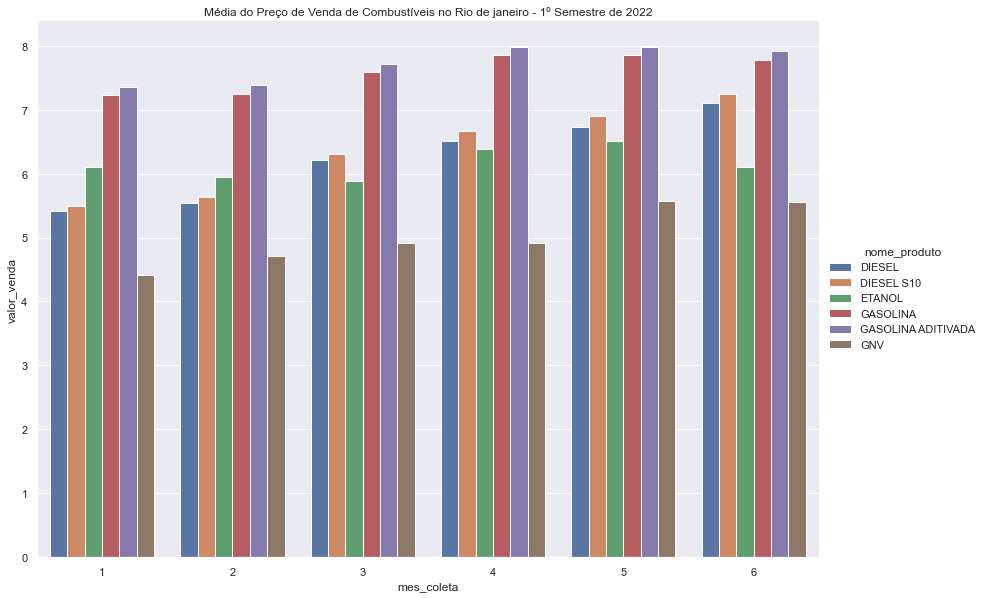

In [9]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bar_plot = sns.catplot(x="mes_coleta", y="valor_venda", hue="nome_produto", kind="bar", data=df_media, height=8.27, aspect=11.7/8.27)
bar_plot.set(title='Média do Preço de Venda de Combustíveis no Rio de janeiro - 1º Semestre de 2022')

[Text(0.5, 1.0, 'Média do Preço de Venda de Combustíveis no Rio de janeiro - 1º Semestre de 2022')]

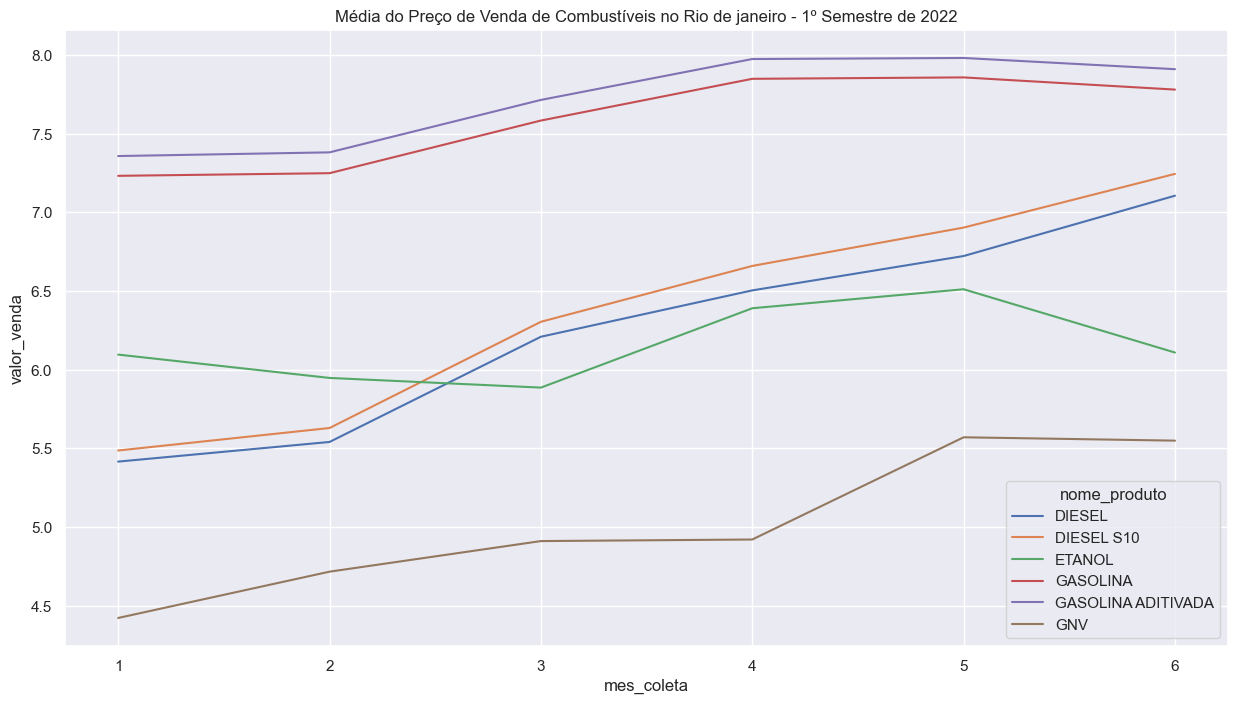

In [10]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
lineplot = sns.lineplot(x="mes_coleta", y="valor_venda", hue="nome_produto", data=df_media)
lineplot.set(title='Média do Preço de Venda de Combustíveis no Rio de janeiro - 1º Semestre de 2022')

## DIESEL no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Diesel no Rio de janeiro - 1º Semestre de 2022')]

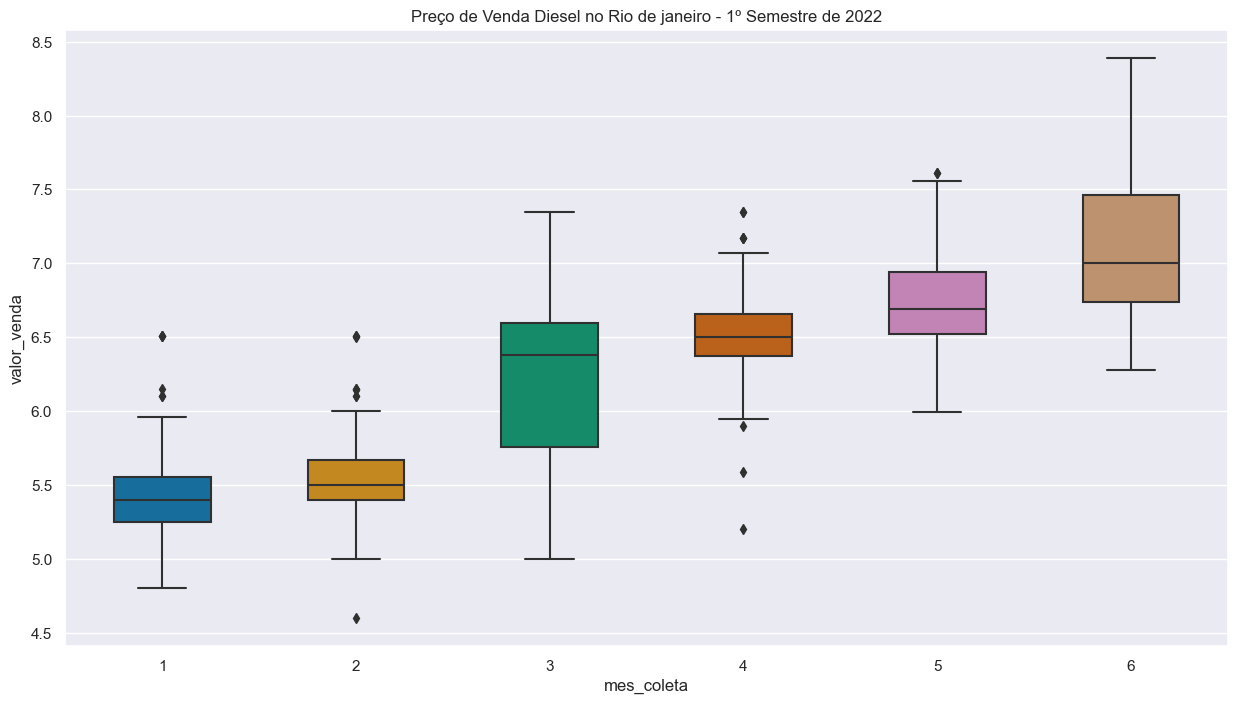

In [11]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_diesel = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_DIESEL, width=0.5, palette="colorblind")
bplot_diesel.set(title='Preço de Venda Diesel no Rio de janeiro - 1º Semestre de 2022')

### 5 estabelecimentos com Diesel mais barato no último mês - Junho 2022

In [12]:
df_rj_DIESEL[df_rj_DIESEL['mes_coleta'] == 6].nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
114126,20729155000170,AUTO POSTO ARCANJO II EIRELI,SE,RJ,ESTRADA MARECHAL MIGUEL SALAZAR MENDES DE MORAIS,1603,None,CIDADE DE DEUS,22770-330,2022-06-06,6,6.28,BRANCA,DIESEL
136263,28502714000117,POSTO SAO JOSE LIMITADA,SE,RJ,RUA PREFEITO JOAO GALINDO,75,None,CENTRO,23900-010,2022-06-07,6,6.29,BRANCA,DIESEL
183699,28621019000174,POSTO OLIVEIRA LTDA,SE,RJ,ESTRADA BR 101,49 50,KM,PRIMEIRO,28800-000,2022-06-09,6,6.29,RAIZEN,DIESEL
280718,28621019000174,POSTO OLIVEIRA LTDA,SE,RJ,ESTRADA BR 101,49 50,KM,PRIMEIRO,28800-000,2022-06-14,6,6.29,RAIZEN,DIESEL
282055,01706669000166,AUTO POSTO PEDRO LESSA LTDA,SE,RJ,AVENIDA PRESIDENTE KENNEDY,S/N,"LT 06,07 E 08",LOTE XV,26183-250,2022-06-14,6,6.29,BRANCA,DIESEL


### 5 estabelecimentos com Diesel mais caro no último mês - Junho 2022

In [20]:
df_rj_DIESEL[df_rj_DIESEL['mes_coleta'] == 6].nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
404929,03546620000119,BRASIL 2000 COMBUSTIVEIS LTDA,SE,RJ,AVENIDA DEPUTADO OCTAVIO CABRAL,919,None,CENTRO,23810-302,2022-06-20,6,8.39,IPIRANGA,DIESEL
549349,03546620000119,BRASIL 2000 COMBUSTIVEIS LTDA,SE,RJ,AVENIDA DEPUTADO OCTAVIO CABRAL,919,None,CENTRO,23810-302,2022-06-27,6,8.39,IPIRANGA,DIESEL
404912,36562874000180,POSTO DE GASOLINA SAO SEBASTIAO DE BELFORD ROX...,SE,RJ,AVENIDA JOSE MARIANO DOS PASSOS,"1,089",None,PRATA,26130-570,2022-06-20,6,8.36,RAIZEN,DIESEL
428192,03825735000142,POSTO PRAIA DA RIBEIRA LTDA,SE,RJ,RODOVIA BR 101,S/N,"KM 487,8 - LADO ESQUERDO",BELEM TQ. DA JAPUIBA,23900-000,2022-06-21,6,8.26,IPIRANGA,DIESEL
476928,36506640000115,POSTO BOCAININHA EIRELI,SE,RJ,AVENIDA MINISTRO AMARAL PEIXOTO,800,None,JARDIM BOA VISTA,27350-370,2022-06-23,6,8.24,IPIRANGA,DIESEL


## DIESEL S10 no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Diesel S10 no Rio de janeiro - 1º Semestre de 2022')]

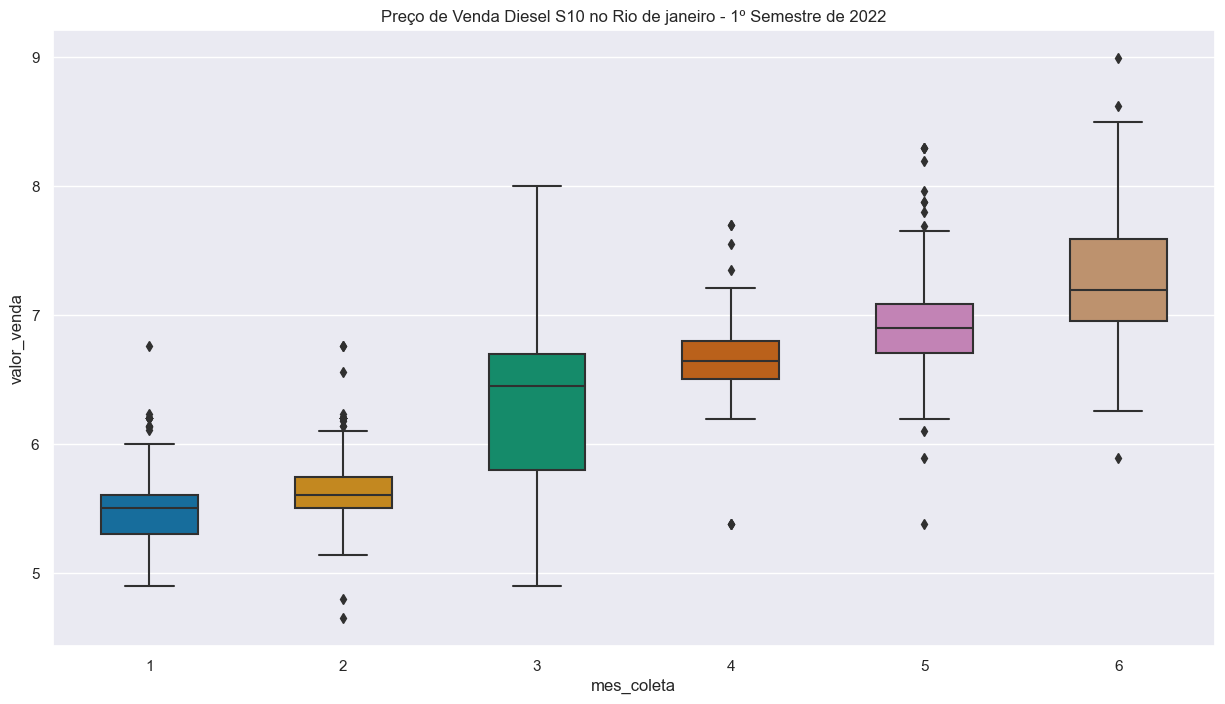

In [14]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_diesel_s10 = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_DIESEL_S10, width=.5, palette="colorblind")
bplot_diesel_s10.set(title='Preço de Venda Diesel S10 no Rio de janeiro - 1º Semestre de 2022')

### 5 estabelecimentos com Diesel S10 mais barato no último mês - Junho 2022

In [21]:
df_rj_DIESEL_S10[df_rj_DIESEL_S10['mes_coleta'] == 6].nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
14382,24242250000104,AUTO POSTO DO TRABALHO VILA DA PENHA LTDA,SE,RJ,AVENIDA VICENTE DE CARVALHO,1388,None,PENHA CIRCULAR,21210-154,2022-06-01,6,5.89,IPIRANGA,DIESEL S10
39892,02280133003533,POSTO ICCAR LTDA,SE,RJ,ALAMEDA SAO BOAVENTURA,524,None,FONSECA,24355-090,2022-06-02,6,6.25,BRANCA,DIESEL S10
156166,02280133003533,POSTO ICCAR LTDA,SE,RJ,ALAMEDA SAO BOAVENTURA,524,None,FONSECA,24355-090,2022-06-08,6,6.35,BRANCA,DIESEL S10
280676,02280133003533,POSTO ICCAR LTDA,SE,RJ,ALAMEDA SAO BOAVENTURA,524,None,FONSECA,24355-090,2022-06-14,6,6.35,BRANCA,DIESEL S10
39923,45543915029244,CARREFOUR COMERCIO E INDUSTRIA LTDA,SE,RJ,RUA DOUTOR OLIVEIRA BOTELHO,349,PARTE,NEVES,24425-000,2022-06-02,6,6.39,VIBRA ENERGIA,DIESEL S10


### 5 estabelecimentos com Diesel S10 mais caro no último mês - Junho 2022

In [22]:
df_rj_DIESEL_S10[df_rj_DIESEL_S10['mes_coleta'] == 6].nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
404931,03546620000119,BRASIL 2000 COMBUSTIVEIS LTDA,SE,RJ,AVENIDA DEPUTADO OCTAVIO CABRAL,919,None,CENTRO,23810-302,2022-06-20,6,8.99,IPIRANGA,DIESEL S10
404913,36562874000180,POSTO DE GASOLINA SAO SEBASTIAO DE BELFORD ROX...,SE,RJ,AVENIDA JOSE MARIANO DOS PASSOS,"1,089",None,PRATA,26130-570,2022-06-20,6,8.62,RAIZEN,DIESEL S10
404938,28838506000193,POSTO SURUI LTDA.,SE,RJ,ESTRADA RIO-TERESOPOLIS,14867,PARTE,SURU,25925-000,2022-06-20,6,8.49,RAIZEN,DIESEL S10
112971,03546620000119,BRASIL 2000 COMBUSTIVEIS LTDA,SE,RJ,AVENIDA DEPUTADO OCTAVIO CABRAL,919,None,CENTRO,23810-302,2022-06-06,6,8.29,IPIRANGA,DIESEL S10
256550,03546620000119,BRASIL 2000 COMBUSTIVEIS LTDA,SE,RJ,AVENIDA DEPUTADO OCTAVIO CABRAL,919,None,CENTRO,23810-302,2022-06-13,6,8.29,IPIRANGA,DIESEL S10


## Etanol no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Etanol no Rio de janeiro - 1º Semestre de 2022')]

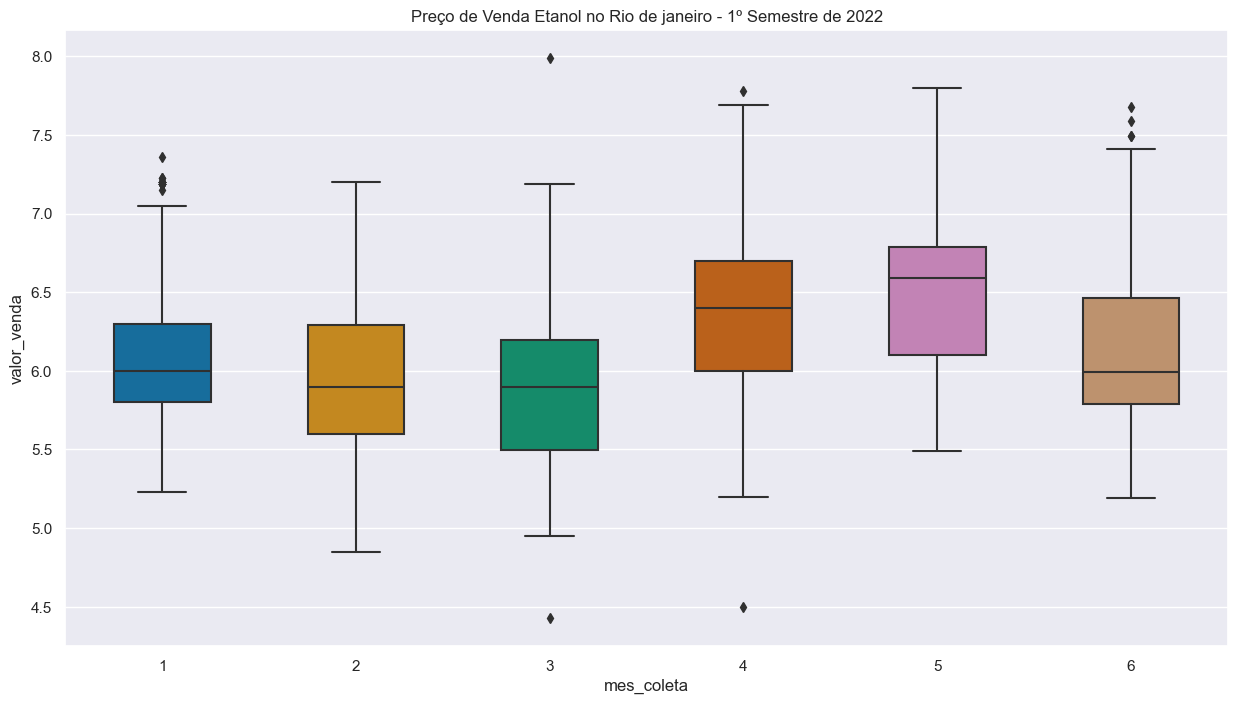

In [15]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_etanol = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_ETANOL, width=.5, palette="colorblind")
bplot_etanol.set(title='Preço de Venda Etanol no Rio de janeiro - 1º Semestre de 2022')

### 5 estabelecimentos com Etanol mais barato no último mês - Junho 2022

In [23]:
df_rj_ETANOL[df_rj_ETANOL['mes_coleta'] == 6].nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
577580,02280133003533,POSTO ICCAR LTDA,SE,RJ,ALAMEDA SAO BOAVENTURA,524,None,FONSECA,24355-090,2022-06-28,6,5.19,BRANCA,ETANOL
577661,33159773000174,POSTO E GARAGEM SAO JORGE DO RIO EIRELI,SE,RJ,RUA CACHAMBI,515,None,CACHAMBI,20775-181,2022-06-28,6,5.19,BRANCA,ETANOL
577701,42219402000121,POSTO LINDA DE COMBUSTIVEIS E SERVICOS AUTOMOT...,SE,RJ,AVENIDA MARECHAL RONDON,1631,None,RIACHUELO,20950-201,2022-06-28,6,5.19,BRANCA,ETANOL
577715,33720095000177,OURO NEGRO COMB LUBR ACESS E SERV LTDA,SE,RJ,AVENIDA MARECHAL RONDON,3053,None,ENGENHO NOVO,20950-071,2022-06-28,6,5.19,BRANCA,ETANOL
579556,16670719000170,POSTO DE GASOLINA QUINTINO LTDA,SE,RJ,RUA CLERIMUNDO DE MELLO,803,None,QUINTINO,20740-320,2022-06-28,6,5.19,BRANCA,ETANOL


### 5 estabelecimentos com Etanol mais caro no último mês - Junho 2022

In [24]:
df_rj_ETANOL[df_rj_ETANOL['mes_coleta'] == 6].nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
185751,27660448000198,3POSTO RONCADOR LTDA.,SE,RJ,RUA JOÃO VALÉRIO,766,None,CENTRO,25900-000,2022-06-09,6,7.68,VIBRA ENERGIA,ETANOL
138775,28852960000107,POSTO BIBI LTDA,SE,RJ,AVENIDA PRESIDENTE ROOSEVELT,1,None,VILA MUQUI,25965-002,2022-06-07,6,7.59,IPIRANGA,ETANOL
15199,33756255000138,POSTO DE SERVIÇOS QUITUNGO LTDA.,SE,RJ,ESTRADA PADRE ROSER,296,None,VILA DA PENHA,21220-560,2022-06-01,6,7.49,VIBRA ENERGIA,ETANOL
158627,39260419000118,RODRIGUES - POSTO E SERVICOS LTDA,SE,RJ,RUA CAP. JUVENAL FIGUEIREDO,SN,None,COELHO,24744-560,2022-06-08,6,7.49,IPIRANGA,ETANOL
138778,27853381000108,AUTO POSTO IRMAOS RESENDE LTDA,SE,RJ,AVENIDA FELICIANO SODRÉ,411,0,VÁRZEA,25950-000,2022-06-07,6,7.41,VIBRA ENERGIA,ETANOL


## Gasolina no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Gasolina no Rio de janeiro - 1º Semestre de 2022')]

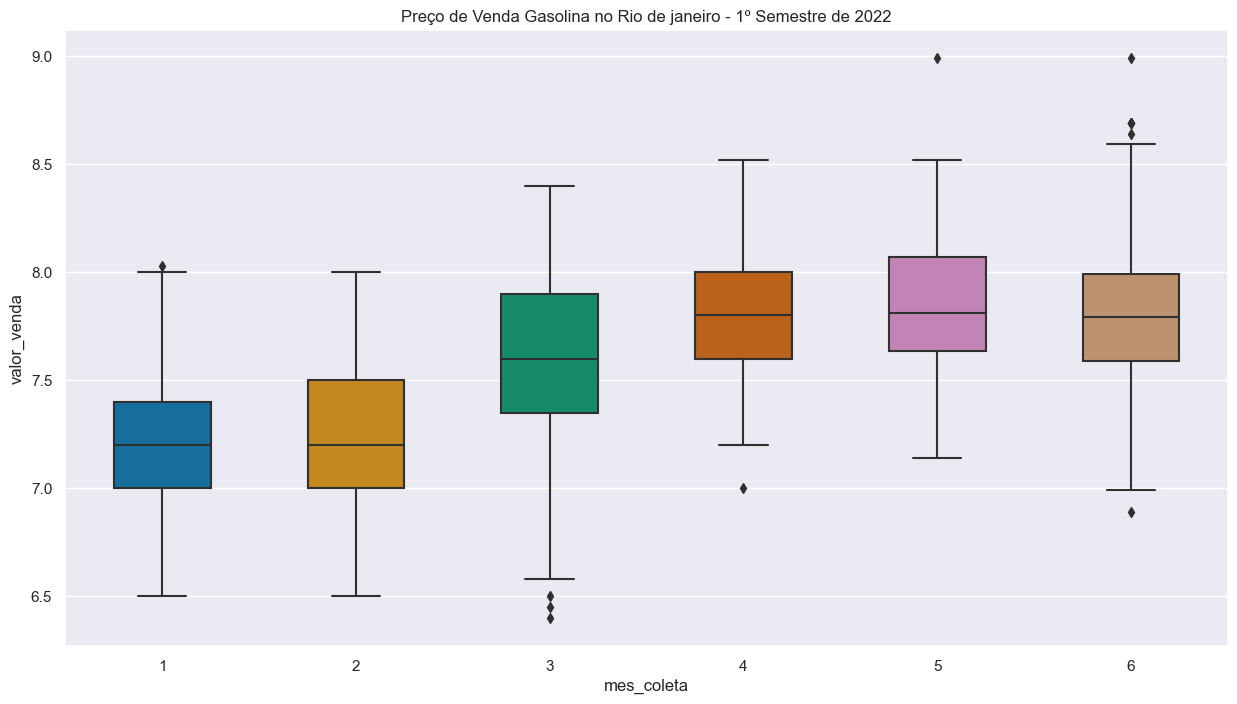

In [16]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_gasolina = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GASOLINA, width=.5, palette="colorblind")
bplot_gasolina.set(title='Preço de Venda Gasolina no Rio de janeiro - 1º Semestre de 2022')

### 5 estabelecimentos com Gasolina mais barato no mês de Junho 2022

In [25]:
df_rj_GASOLINA[df_rj_GASOLINA['mes_coleta'] == 6].nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
611183,09547694000156,REDE OSORIO'S DE MARICA COMERCIO DE GAS NATURA...,SE,RJ,RUA JOSE BARBOSA DA CUNHA,S/N,"LOTE 01,02,12",ITAPEBA,24912-350,2022-06-30,6,6.89,BRANCA,GASOLINA
577719,33672577000107,AUTO MECANICA APOLO LTDA,SE,RJ,RUA PREF OLIMPIO DE MELO,1275,None,BENFICA,20910-210,2022-06-28,6,6.99,BRANCA,GASOLINA
579557,16670719000170,POSTO DE GASOLINA QUINTINO LTDA,SE,RJ,RUA CLERIMUNDO DE MELLO,803,None,QUINTINO,20740-320,2022-06-28,6,6.99,BRANCA,GASOLINA
580038,21659298000116,POSTO DE GASOLINA AUTA DE SOUSA LTDA,SE,RJ,RUA FLORENTINA,312,None,CASCADURA,21350-010,2022-06-28,6,6.99,BRANCA,GASOLINA
610832,01280449000113,GOLF DERIVADOS DE PETROLEO LTDA,SE,RJ,RODOVIA WASHINGTON LUIZ,13500,None,JARDIM PRIMAVERA,25213-005,2022-06-30,6,6.99,BRANCA,GASOLINA


### 5 estabelecimentos com Gasolina mais caro no mês de Junho 2022

In [26]:
df_rj_GASOLINA[df_rj_GASOLINA['mes_coleta'] == 6].nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
303389,03317678000190,POSTO JARDIM OCEANICO LTDA.,SE,RJ,AVENIDA OLEGARIO MACIEL,319,None,BARRA DA TIJUCA,22621-200,2022-06-15,6,8.99,RAIZEN,GASOLINA
430529,03825735000142,POSTO PRAIA DA RIBEIRA LTDA,SE,RJ,RODOVIA BR 101,S/N,"KM 487,8 - LADO ESQUERDO",BELEM TQ. DA JAPUIBA,23900-000,2022-06-21,6,8.69,IPIRANGA,GASOLINA
430535,31303696000159,AUTO POSTO JAPUÍBA LTDA.,SE,RJ,RODOVIA GOVERNADOR MÁRIO COVAS,S/N,KM 96 + 400,JAPUIBA,23900-000,2022-06-21,6,8.69,IPIRANGA,GASOLINA
430537,03340868000129,AUTO POSTO ENCRUZO DA ENSEADA LTDA,SE,RJ,RUA D LOTE 02,SN,None,PARQUE CAMPO BELO - JAPUÍBA,23900-000,2022-06-21,6,8.69,BRANCA,GASOLINA
590599,03340868000129,AUTO POSTO ENCRUZO DA ENSEADA LTDA,SE,RJ,RUA D LOTE 02,SN,None,PARQUE CAMPO BELO - JAPUÍBA,23900-000,2022-06-29,6,8.69,BRANCA,GASOLINA


## Gasolina Aditivada no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Gasolina Aditivada no Rio de janeiro - 1º Semestre de 2022')]

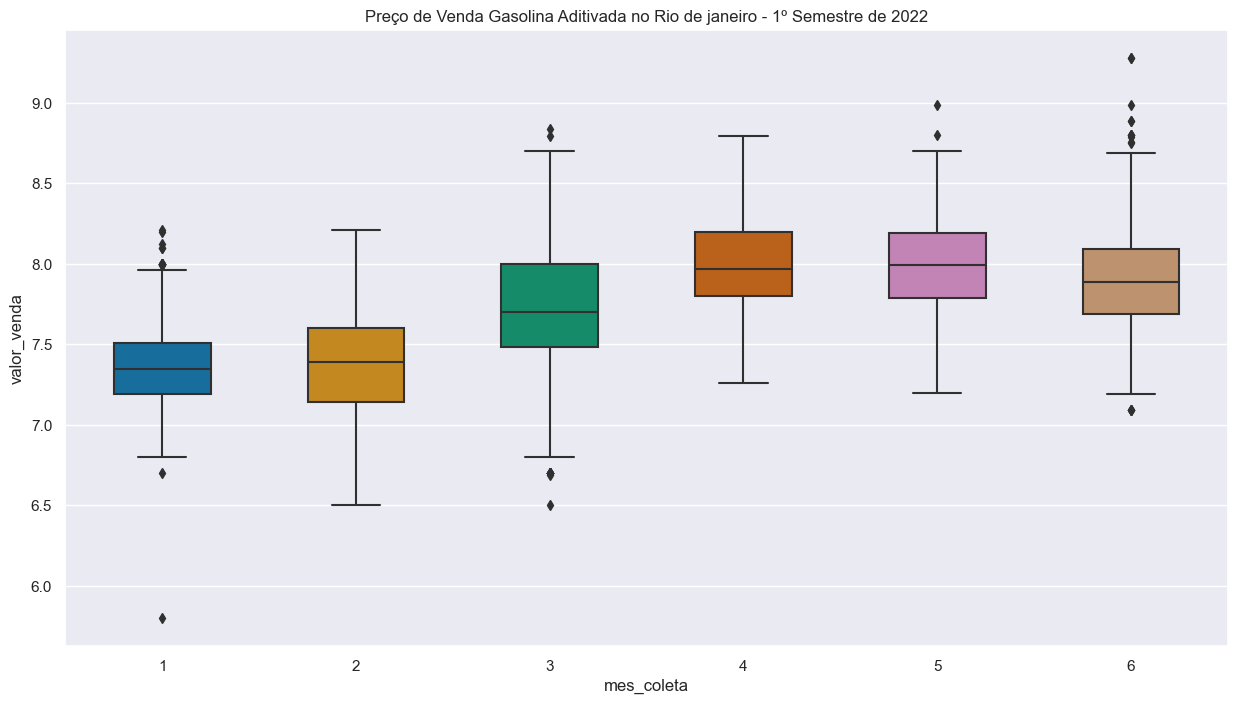

In [17]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_gasolina_adt = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GASOLINA_ADITIVADA, width=.5, palette="colorblind")
bplot_gasolina_adt.set(title='Preço de Venda Gasolina Aditivada no Rio de janeiro - 1º Semestre de 2022')

### 5 estabelecimentos com Gasolina Aditivada mais barato no mês de Junho 2022

In [36]:
df_rj_GASOLINA_ADITIVADA[df_rj_GASOLINA_ADITIVADA['mes_coleta'] == 6].nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
577717,33672577000107,AUTO MECANICA APOLO LTDA,SE,RJ,RUA PREF OLIMPIO DE MELO,1275,None,BENFICA,20910-210,2022-06-28,6,7.09,BRANCA,GASOLINA ADITIVADA
610830,01280449000113,GOLF DERIVADOS DE PETROLEO LTDA,SE,RJ,RODOVIA WASHINGTON LUIZ,13500,None,JARDIM PRIMAVERA,25213-005,2022-06-30,6,7.09,BRANCA,GASOLINA ADITIVADA
611440,12635558000122,AUTO POSTO E SERVICOS IMBASSAI LTDA,SE,RJ,RODOVIA ERNANI DO AMARAL PEIXOTO,20357,QUADRAAREA LOTE 3A,SAO JOSE DO IMBASSAI,24931-000,2022-06-30,6,7.09,VIBRA ENERGIA,GASOLINA ADITIVADA
611749,17081422000131,POSTO AMRX COMERCIO DE COMBUSTIVEIS LTDA,SE,RJ,RODOVIA AMARAL PEIXOTO,0,AREA 018 C 2 INOA,AREA DE TERRA INOA,24900-001,2022-06-30,6,7.09,BRANCA,GASOLINA ADITIVADA
590696,06226911000118,AUTO POSTO FERROVIA EIRELI,SE,RJ,RUA ARTHUR BERNARDES,35,None,CENTRO,28800-000,2022-06-29,6,7.19,VIBRA ENERGIA,GASOLINA ADITIVADA


### 5 estabelecimentos com Gasolina Aditivada mais caro no mês de Junho 2022

In [35]:
df_rj_GASOLINA_ADITIVADA[df_rj_GASOLINA_ADITIVADA['mes_coleta'] == 6].nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
185752,27660448000198,3POSTO RONCADOR LTDA.,SE,RJ,RUA JOÃO VALÉRIO,766,None,CENTRO,25900-000,2022-06-09,6,9.28,VIBRA ENERGIA,GASOLINA ADITIVADA
408031,27660448000198,3POSTO RONCADOR LTDA.,SE,RJ,RUA JOÃO VALÉRIO,766,None,CENTRO,25900-000,2022-06-20,6,9.28,VIBRA ENERGIA,GASOLINA ADITIVADA
303387,03317678000190,POSTO JARDIM OCEANICO LTDA.,SE,RJ,AVENIDA OLEGARIO MACIEL,319,None,BARRA DA TIJUCA,22621-200,2022-06-15,6,8.99,RAIZEN,GASOLINA ADITIVADA
430527,03825735000142,POSTO PRAIA DA RIBEIRA LTDA,SE,RJ,RODOVIA BR 101,S/N,"KM 487,8 - LADO ESQUERDO",BELEM TQ. DA JAPUIBA,23900-000,2022-06-21,6,8.89,IPIRANGA,GASOLINA ADITIVADA
430533,31303696000159,AUTO POSTO JAPUÍBA LTDA.,SE,RJ,RODOVIA GOVERNADOR MÁRIO COVAS,S/N,KM 96 + 400,JAPUIBA,23900-000,2022-06-21,6,8.89,IPIRANGA,GASOLINA ADITIVADA


## GLP no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda GLP no Rio de janeiro - 1º Semestre de 2022')]

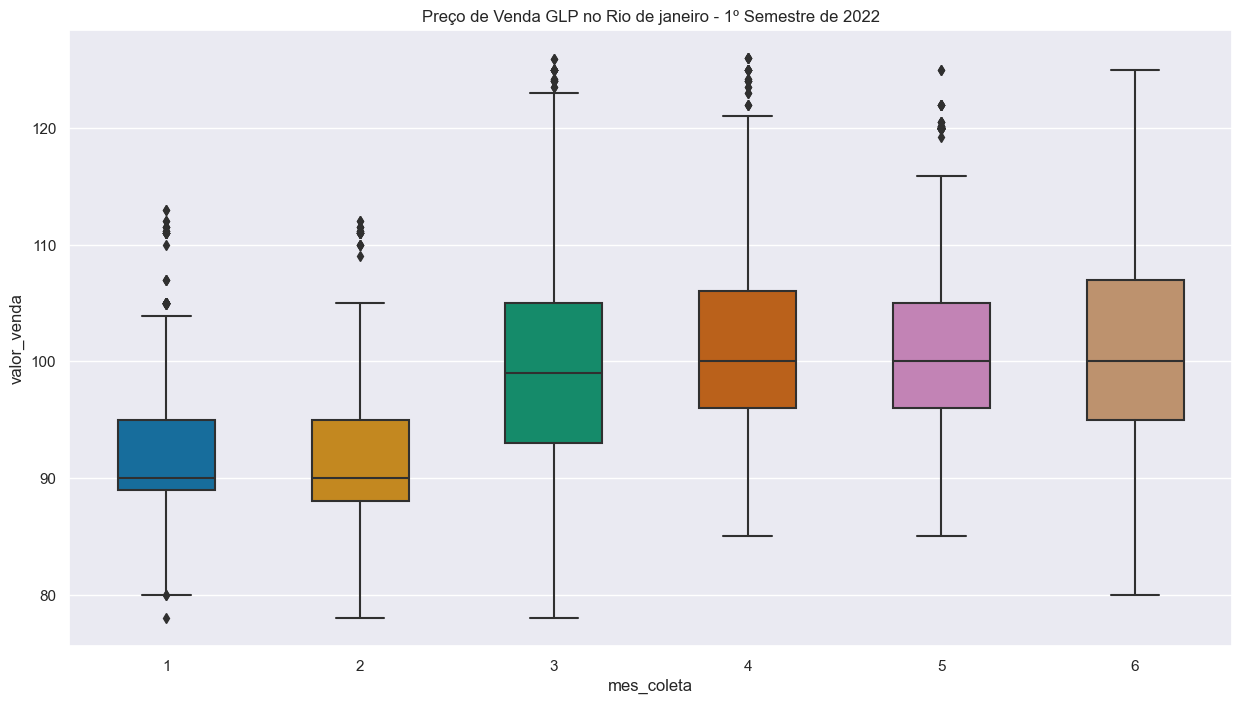

In [18]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_glp = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GLP, width=0.5, palette="colorblind")
bplot_glp.set(title='Preço de Venda GLP no Rio de janeiro - 1º Semestre de 2022')

### 5 estabelecimentos com GLP mais barato no mês de Junho 2022

In [34]:
df_rj_GLP[df_rj_GLP['mes_coleta'] == 6].nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
287726,06226068000170,COMERCIAL DE ALIMENTOS E GÁS MARRAKESH LTDA,SE,RJ,RUA MAJOR PADILHA,130,None,CENTRO,28470-000,2022-06-14,6,80.00,ULTRAGAZ,GLP
287933,11573286000110,COMÉRCIO DE GÁS 13 DE JUNHO DE PÁDUA LTDA,SE,RJ,RUA D,S/N,"LOTES 95, 96, 97 QUADRA E",LOTEAMENTO CAMPO ALEGRE,28470-000,2022-06-14,6,80.00,ULTRAGAZ,GLP
581468,29713309000100,DISTRIBUIDORA DE GAS AG EIRELI,SE,RJ,RUA DOUTOR PAULO HERVE,624,None,BINGEN,25665-132,2022-06-28,6,84.99,BRANCA,GLP
142305,11175022000109,UNAGAS COMERCIO DE GAS LP LTDA,SE,RJ,AVENIDA RIO D'OURO,S/N,LOTE 03 QUADRA03,ITAIPU,26143-500,2022-06-07,6,85.00,SUPERGASBRAS ENERGIA,GLP
410952,11175022000109,UNAGAS COMERCIO DE GAS LP LTDA,SE,RJ,AVENIDA RIO D'OURO,S/N,LOTE 03 QUADRA03,ITAIPU,26143-500,2022-06-20,6,85.00,SUPERGASBRAS ENERGIA,GLP


### 5 estabelecimentos com GLP mais caro no mês de Junho 2022

In [33]:
df_rj_GLP[df_rj_GLP['mes_coleta'] == 6].nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
307309,35724942000105,SUPER MACAE DISTRIBUIDORA DE GAS E AGUA EIRELI,SE,RJ,AVENIDA DOUTOR HUMBERTO DE QUEIROZ MATOSO,308,None,CAMPO DO OESTE,27936-529,2022-06-15,6,125.00,BRANCA,GLP
19466,35724942000105,SUPER MACAE DISTRIBUIDORA DE GAS E AGUA EIRELI,SE,RJ,AVENIDA DOUTOR HUMBERTO DE QUEIROZ MATOSO,308,None,CAMPO DO OESTE,27936-529,2022-06-01,6,124.99,BRANCA,GLP
411639,35724942000105,SUPER MACAE DISTRIBUIDORA DE GAS E AGUA EIRELI,SE,RJ,AVENIDA DOUTOR HUMBERTO DE QUEIROZ MATOSO,308,None,CAMPO DO OESTE,27936-529,2022-06-20,6,124.99,BRANCA,GLP
18464,02895940000111,J P AMORIM LTDA.,SE,RJ,RUA PREFEITO JUVENAL BARRETO JUNIOR,219,None,AROEIRA,27946-430,2022-06-01,6,122.00,SUPERGASBRAS ENERGIA,GLP
19232,28659532000154,F R M CORDEIRO REVENDEDOR DE GAS LTDA,SE,RJ,AVENIDA CARLOS AUGUSTO TINOCO GARCIA,S/N,None,SOL Y MAR,27940-290,2022-06-01,6,122.00,SUPERGASBRAS ENERGIA,GLP


## GNV no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda GNV no Rio de janeiro - 1º Semestre de 2022')]

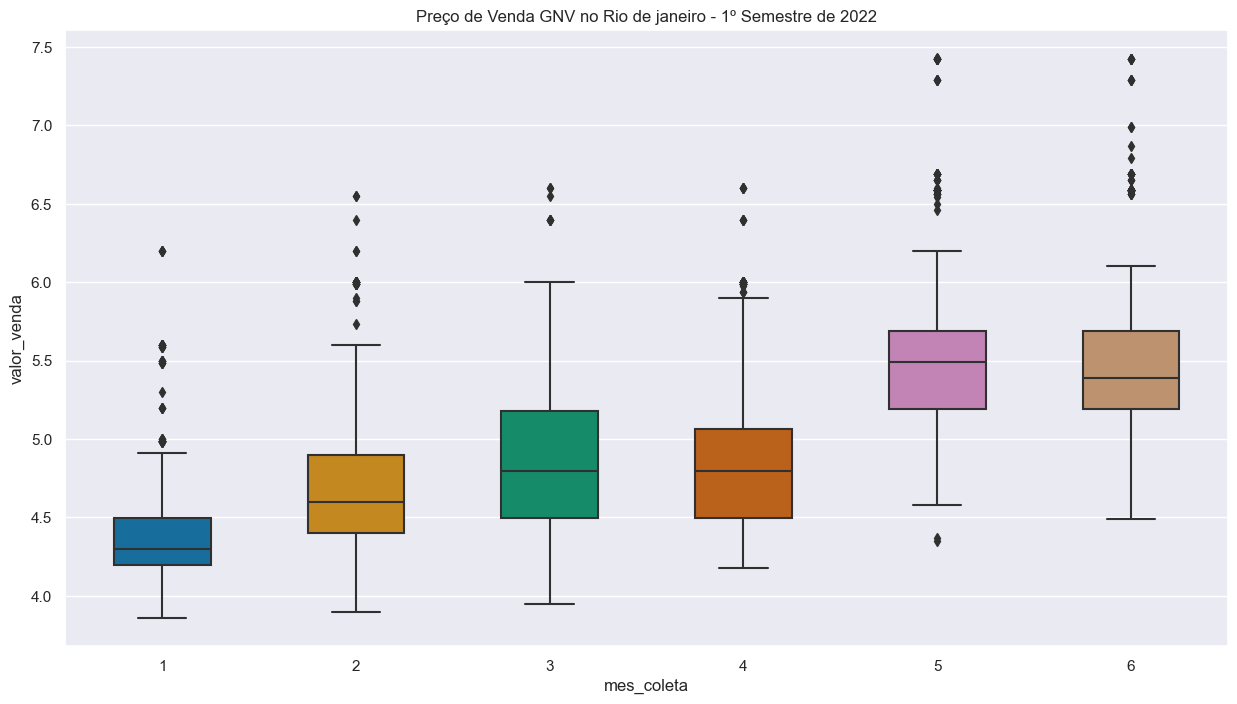

In [19]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_gnv = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GNV, width=0.5, palette="colorblind")
bplot_gnv.set(title='Preço de Venda GNV no Rio de janeiro - 1º Semestre de 2022')

### 5 estabelecimentos com GNV mais barato no mês de Junho 2022

In [32]:
df_rj_GNV[df_rj_GNV['mes_coleta'] == 6].nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
404326,29756947000109,POSTO DE GASOLINA KING KONG EIRELI,SE,RJ,RUA VISCONDE DO RIO BRANCO,756,None,CENTRO,24020-003,2022-06-20,6,4.49,VIBRA ENERGIA,GNV
428278,42306886000146,CATITA AUTO SERVICOS LTDA,SE,RJ,AVENIDA SANTA CRUZ,6066,None,BANGU,21830-009,2022-06-21,6,4.89,VIBRA ENERGIA,GNV
428301,04919058000194,AUTO POSTO PARADA DA PRAÇA LTDA,SE,RJ,AVENIDA SANTA CRUZ,5450,None,BANGU,21830-000,2022-06-21,6,4.89,BRANCA,GNV
429754,29615923000130,AUTO POSTO PARADA DE BANGU LTDA,SE,RJ,RUA RANGEL PESTANA,34,E 48 C/ ENTRADA SUPLEMENTAR NA RUA ...,BANGU,21820-040,2022-06-21,6,4.94,RAIZEN,GNV
429273,13783013000126,POSTO DE GASOLINA SHOW DE BOLA LTDA,SE,RJ,RUA FRANCISCO REAL,1933,None,BANGU,21810-041,2022-06-21,6,4.95,BRANCA,GNV


### 5 estabelecimentos com GNV mais caro no mês de Junho 2022

In [31]:
df_rj_GNV[df_rj_GNV['mes_coleta'] == 6].nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
156903,09547694000156,REDE OSORIO'S DE MARICA COMERCIO DE GAS NATURA...,SE,RJ,RUA JOSE BARBOSA DA CUNHA,S/N,"LOTE 01,02,12",ITAPEBA,24912-350,2022-06-08,6,7.42,BRANCA,GNV
157021,11270315000175,POSTO DE COMBUSTIVEIS PIEDRAS DEL MAR LTDA.,SE,RJ,RODOVIA ERNANI DO AMARAL PEIXOTO,33,N/T,ITAPEBA,24912-710,2022-06-08,6,7.42,BRANCA,GNV
329116,09547694000156,REDE OSORIO'S DE MARICA COMERCIO DE GAS NATURA...,SE,RJ,RUA JOSE BARBOSA DA CUNHA,S/N,"LOTE 01,02,12",ITAPEBA,24912-350,2022-06-16,6,7.42,BRANCA,GNV
329176,11270315000175,POSTO DE COMBUSTIVEIS PIEDRAS DEL MAR LTDA.,SE,RJ,RODOVIA ERNANI DO AMARAL PEIXOTO,33,N/T,ITAPEBA,24912-710,2022-06-16,6,7.42,BRANCA,GNV
428974,09547694000156,REDE OSORIO'S DE MARICA COMERCIO DE GAS NATURA...,SE,RJ,RUA JOSE BARBOSA DA CUNHA,S/N,"LOTE 01,02,12",ITAPEBA,24912-350,2022-06-21,6,7.42,BRANCA,GNV
